In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
data = pd.read_csv('Kershaw_FF_2020.csv')

In [24]:
# Constants
g = 9.81  # m/s^2
rho = 1.225  # kg/m^3 (air density)
r = 0.037  # m (radius of the baseball)
A = np.pi * r**2  # cross-sectional area
m = 0.145  # kg (mass of the baseball)

In [25]:
# Extracted data from CSV (example values)
release_pos_x = data['release_pos_x'].iloc[0]  # meters
release_pos_y = data['release_pos_y'].iloc[0]  # meters
release_pos_z = data['release_pos_z'].iloc[0]  # meters
vx0 = data['vx0'].iloc[0]  # m/s
vy0 = data['vy0'].iloc[0]  # m/s
vz0 = data['vz0'].iloc[0]  # m/s
spin_rate_rpm = data['release_spin_rate'].iloc[0]  # rpm
pfx_x = data['pfx_x'].iloc[0]  # inches
pfx_z = data['pfx_z'].iloc[0]  # inches
ax = data['ax'].iloc[0]  # m/s^2
ay = data['ay'].iloc[0]  # m/s^2
az = data['az'].iloc[0]  # m/s^2

In [26]:
# Convert spin rate to radians per second
spin_rate_rad_s = spin_rate_rpm * 2 * np.pi / 60

In [27]:
# Initial conditions
initial_velocity = np.array([vx0, vy0, vz0])  # m/s
initial_position = np.array([release_pos_x, release_pos_y, release_pos_z])  # m

In [28]:
# Magnus force coefficient (C_M) approximation
C_M = 0.5 * rho * A * r

In [29]:
# Drag force coefficient (C_D) approximation
C_D = 0.47  # Typical value for a baseball

In [30]:
# Estimate SpinX, SpinY, SpinZ from pfx_x and pfx_z
# Here, we make a rough estimate assuming proportional relationships.
total_break = np.sqrt(pfx_x**2 + pfx_z**2)
SpinX = spin_rate_rad_s * (pfx_x / total_break)
SpinY = spin_rate_rad_s * (pfx_z / total_break)
SpinZ = spin_rate_rad_s * (az / np.sqrt(ax**2 + ay**2 + az**2))  # rough estimate

In [31]:
def equations(t, y):
    # Unpack the state vector
    x, y, z, vx, vy, vz = y
    
    # Velocity vector
    v = np.array([vx, vy, vz])
    v_magnitude = np.linalg.norm(v)
    
    # Magnus force
    F_M = C_M * np.cross([SpinX, SpinY, SpinZ], v)
    
    # Drag force
    F_D = -C_D * v_magnitude * v
    
    # Gravitational force
    F_g = np.array([0, -m * g, 0])
    
    # Total force
    F_total = F_g + F_M + F_D
    
    # Acceleration
    ax, ay, az = F_total / m
    
    return [vx, vy, vz, ax, ay, az]


In [33]:
# Initial state vector
y0 = [release_pos_x, release_pos_y, release_pos_z, vx0, vy0, vz0]

In [34]:
# Time span for the simulation
t_span = (0, 0.5)  # Simulate for 0.5 seconds (sufficient for a baseball pitch)
t_eval = np.linspace(0, 0.5, 500)  # Evaluation points

In [35]:
# Solve the differential equations
solution = solve_ivp(equations, t_span, y0, t_eval=t_eval, method='RK45')

In [36]:
# Extract the solution
x, y, z, vx, vy, vz = solution.y

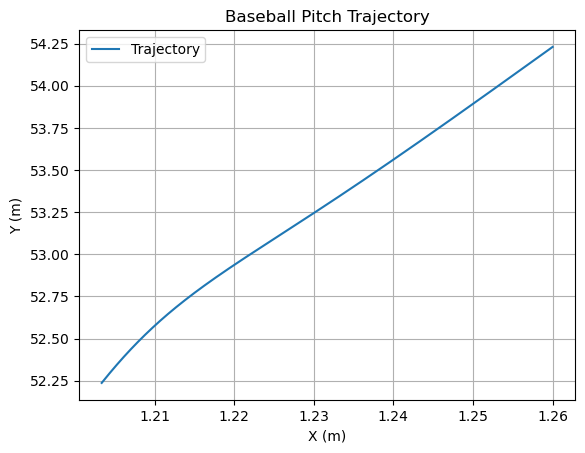

In [37]:
# Plot the trajectory
plt.figure()
plt.plot(x, y, label='Trajectory')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Baseball Pitch Trajectory')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Display some results
x[-1], y[-1], z[-1]  # Final position of the baseball

(1.2033518982482656, 52.23675613581765, 6.08649310881679)

In [39]:
SpinX = (SpinX * 60) / (2 * np.pi)
SpinY = (SpinY * 60) / (2 * np.pi)
SpinZ = (SpinZ * 60) / (2 * np.pi)

In [40]:
SpinX, SpinY, SpinZ

(-498.3840919012712, 2476.345956634441, -1060.8958322551368)